In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('dataset/wafer.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Columns: 1559 entries, feature_1 to Class
dtypes: float64(1), int64(1558)
memory usage: 21.0 MB


In [5]:
duplicate = df.drop('Class',axis=1).T.drop_duplicates().T.columns
Class = df['Class']
df = df[duplicate]
df['Class'] = Class

In [6]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1557,feature_1558,Class
0,100,160,1.6000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,83,4.1500,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,99,150,1.5151,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,40,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,234,19.5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


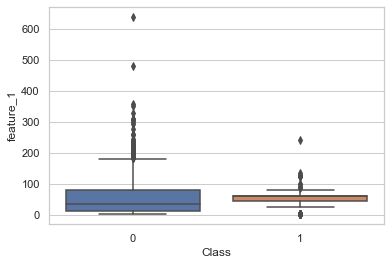

In [7]:
sns.set(style="whitegrid")
ax = sns.boxplot(x="Class", y="feature_1",data=df)

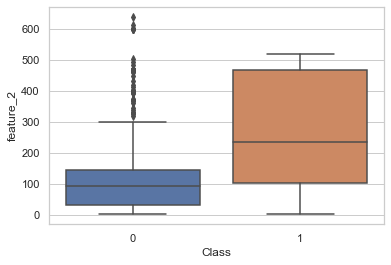

In [8]:
ax = sns.boxplot(x="Class", y="feature_2",data=df)

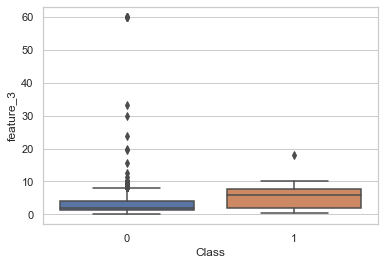

In [9]:
ax = sns.boxplot(x="Class", y="feature_3",data=df)

In [10]:
pd.DataFrame(df[['feature_1','feature_2','feature_3','Class']].corr()['Class'])

,Class
feature_1,0.006458
feature_2,0.330720
feature_3,0.108288
Class,1.000000


In [11]:
zero = pd.DataFrame((df == 0).astype(int).sum(axis=0))

In [12]:
all_zero = zero[zero[0]>1761].index

In [13]:
df.drop(all_zero,axis=1,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Columns: 723 entries, feature_1 to Class
dtypes: float64(1), int64(722)
memory usage: 9.7 MB


In [16]:
X = df.drop('Class',axis=1)
y = df['Class'].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
from xgboost import XGBClassifier

model = XGBClassifier(silent=True,
                      booster = 'gbtree',
                      scale_pos_weight=5,
                      learning_rate=0.01,  
                      colsample_bytree = 0.7,
                      subsample = 0.5,
                      max_delta_step = 3,
                      reg_lambda = 2,
                     objective='binary:logistic',
                      
                      n_estimators=818, 
                      max_depth=8,
                     )

eval_set = [(X_test, y_test)]
eval_metric = ["logloss"]


In [19]:
model.fit(X_train, y_train,early_stopping_rounds=50, eval_metric=eval_metric, eval_set=eval_set)

[12:35:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-logloss:0.68665
Will train until validation_0-logloss hasn't improved in 50 rounds.
[1]	validation_0-logloss:0.68024
[2]	validation_0-logloss:0.67363
[3]	validation_0-logloss:0.66725
[4]	validation_0-logloss:0.66062
[5]	validation_0-logloss:0.65477
[6]	validation_0-logloss:0.64848
[7]	validation_0-logloss:0.64216
[8]	validation_0-logloss:0.63665
[9]	validation_0-logloss:0.63084
[10]	validation_0-logloss:0.62471
[11]	validation_0-logloss:0.61957
[12]	validation_0-logloss:0.61401
[13]	validation_0-logloss:0.60797
[14]	validation_0-logloss:0.60225
[15]	validation_0-logloss:0.59681
[16]	validatio

[225]	validation_0-logloss:0.23767
[226]	validation_0-logloss:0.23729
[227]	validation_0-logloss:0.23692
[228]	validation_0-logloss:0.23647
[229]	validation_0-logloss:0.23609
[230]	validation_0-logloss:0.23563
[231]	validation_0-logloss:0.23533
[232]	validation_0-logloss:0.23493
[233]	validation_0-logloss:0.23427
[234]	validation_0-logloss:0.23390
[235]	validation_0-logloss:0.23390
[236]	validation_0-logloss:0.23372
[237]	validation_0-logloss:0.23313
[238]	validation_0-logloss:0.23251
[239]	validation_0-logloss:0.23217
[240]	validation_0-logloss:0.23187
[241]	validation_0-logloss:0.23175
[242]	validation_0-logloss:0.23133
[243]	validation_0-logloss:0.23106
[244]	validation_0-logloss:0.23072
[245]	validation_0-logloss:0.23037
[246]	validation_0-logloss:0.22998
[247]	validation_0-logloss:0.22976
[248]	validation_0-logloss:0.22912
[249]	validation_0-logloss:0.22863
[250]	validation_0-logloss:0.22833
[251]	validation_0-logloss:0.22797
[252]	validation_0-logloss:0.22780
[253]	validation_0-l

[460]	validation_0-logloss:0.20569
[461]	validation_0-logloss:0.20565
[462]	validation_0-logloss:0.20569
[463]	validation_0-logloss:0.20547
[464]	validation_0-logloss:0.20551
[465]	validation_0-logloss:0.20553
[466]	validation_0-logloss:0.20571
[467]	validation_0-logloss:0.20566
[468]	validation_0-logloss:0.20554
[469]	validation_0-logloss:0.20574
[470]	validation_0-logloss:0.20565
[471]	validation_0-logloss:0.20533
[472]	validation_0-logloss:0.20516
[473]	validation_0-logloss:0.20534
[474]	validation_0-logloss:0.20502
[475]	validation_0-logloss:0.20492
[476]	validation_0-logloss:0.20495
[477]	validation_0-logloss:0.20495
[478]	validation_0-logloss:0.20497
[479]	validation_0-logloss:0.20486
[480]	validation_0-logloss:0.20522
[481]	validation_0-logloss:0.20525
[482]	validation_0-logloss:0.20512
[483]	validation_0-logloss:0.20533
[484]	validation_0-logloss:0.20543
[485]	validation_0-logloss:0.20550
[486]	validation_0-logloss:0.20558
[487]	validation_0-logloss:0.20547
[488]	validation_0-l

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=3, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=818, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=2, scale_pos_weight=5, silent=True, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [20]:
predictions = model.predict_proba(X_test)[:,-1]

In [21]:
roc_auc_score(y_test, predictions)

0.9363679134321335

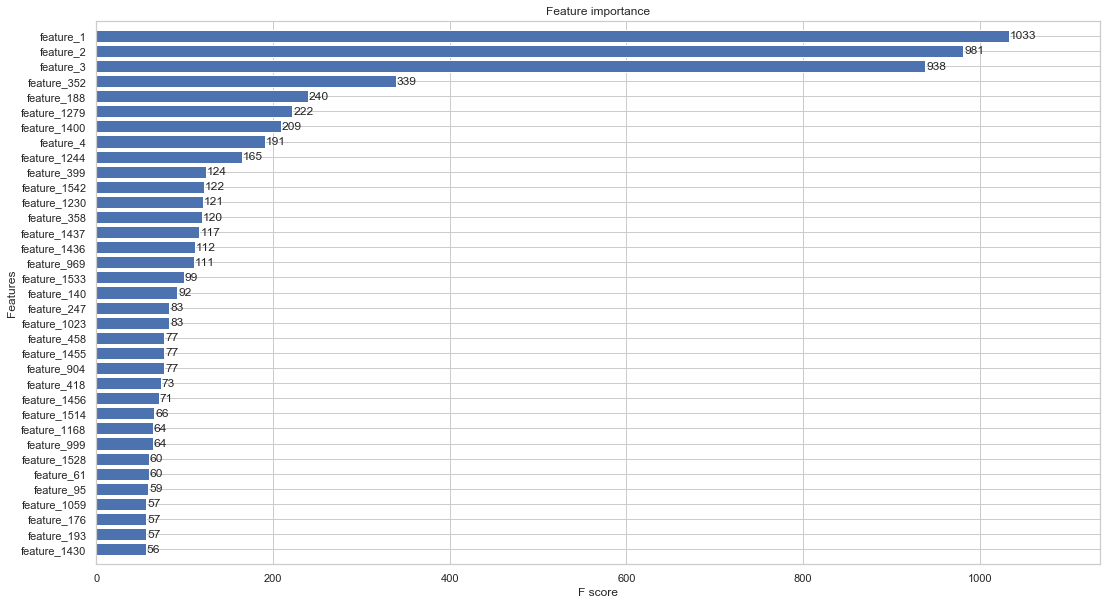

In [22]:
import matplotlib.pyplot as plt     
model.feature_importances_
from matplotlib import pyplot
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(18,10))
plot_importance(model, max_num_features=35, height=0.8, ax=ax)
pyplot.show()